<a href="https://colab.research.google.com/github/KKANGCHONG/2024-1_Study/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

내 드라이브와 연결하기

In [ ]:
import gc
gc.collect()

23

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Multi-class classification


1. mon_standard.pkl > array code
- 폴더 구조: 내 드라이브/2024_ML/group_project/content/mon_standard.pkl

* 폴더 구조: 내 드라이브/2024_ML/group_project/content/unmon_standard10.pkl

사이버캠퍼스에서 다운 받은 pkl 파일을 내 드라이브에 저장하고, 내 드라이브/~ 뒤에 들어가는 경로명을 MyDrive/~



In [ ]:
import pickle

USE_SUBLABEL = False
URL_PER_SITE = 10
TOTAL_URLS   = 950

# Load the pickle file
print("Loading datafile...")
with open('/content/gdrive/MyDrive/2024_ML/group_project/content/mon_standard.pkl', 'rb') as fi: # Path to mon_standard.pkl in Colab
    data = pickle.load(fi)

X1 = [] # Array to store instances (timestamps) - 19,000 instances, e.g., [[0.0, 0.5, 3.4, ...], [0.0, 4.5, ...], [0.0, 1.5, ...], ... [... ,45.8]]
X2 = [] # Array to store instances (direction*size) - size information
y = [] # Array to store the site of each instance - 19,000 instances, e.g., [0, 0, 0, 0, 0, 0, ..., 94, 94, 94, 94, 94]

# Differentiate instances and sites, and store them in the respective x and y arrays
# x array (direction*timestamp), y array (site label)
for i in range(TOTAL_URLS):
    if USE_SUBLABEL:
        label = i
    else:
        label = i // URL_PER_SITE # Calculate which site's URL the current URL being processed belongs to and set that value as the label. Thus, URLs fetched from the same site are labeled identically.
    for sample in data[i]:
        size_seq = []
        time_seq = []
        for c in sample:
            dr = 1 if c > 0 else -1
            time_seq.append(abs(c))
            size_seq.append(dr * 512)
        X1.append(time_seq)
        X2.append(size_seq)
        y.append(label)
size = len(y)

print(f'Total samples: {size}') # Output: 19000


Loading datafile...
Total samples: 19000


In [ ]:
import pandas as pd

# Create DataFrame
df = pd.DataFrame({
    'Timestamps': X1,
    'Direction_Size': X2,
    'Label': y
})

df['Cumulative_Packet'] = df['Direction_Size'].cumsum()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamps      19000 non-null  object
 1   Direction_Size  19000 non-null  object
 2   Label           19000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 445.4+ KB


In [ ]:
df.head()

,Timestamps,Direction_Size,Label
0,"[0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...","[-512, -512, 512, -512, 512, -512, 512, 512, -...",0
1,"[0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...",0
2,"[0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...","[-512, -512, 512, -512, 512, -512, 512, 512, -...",0
3,"[0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...","[-512, -512, 512, -512, 512, -512, 512, 512, -...",0
4,"[0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...","[-512, -512, 512, -512, 512, -512, 512, 512, -...",0


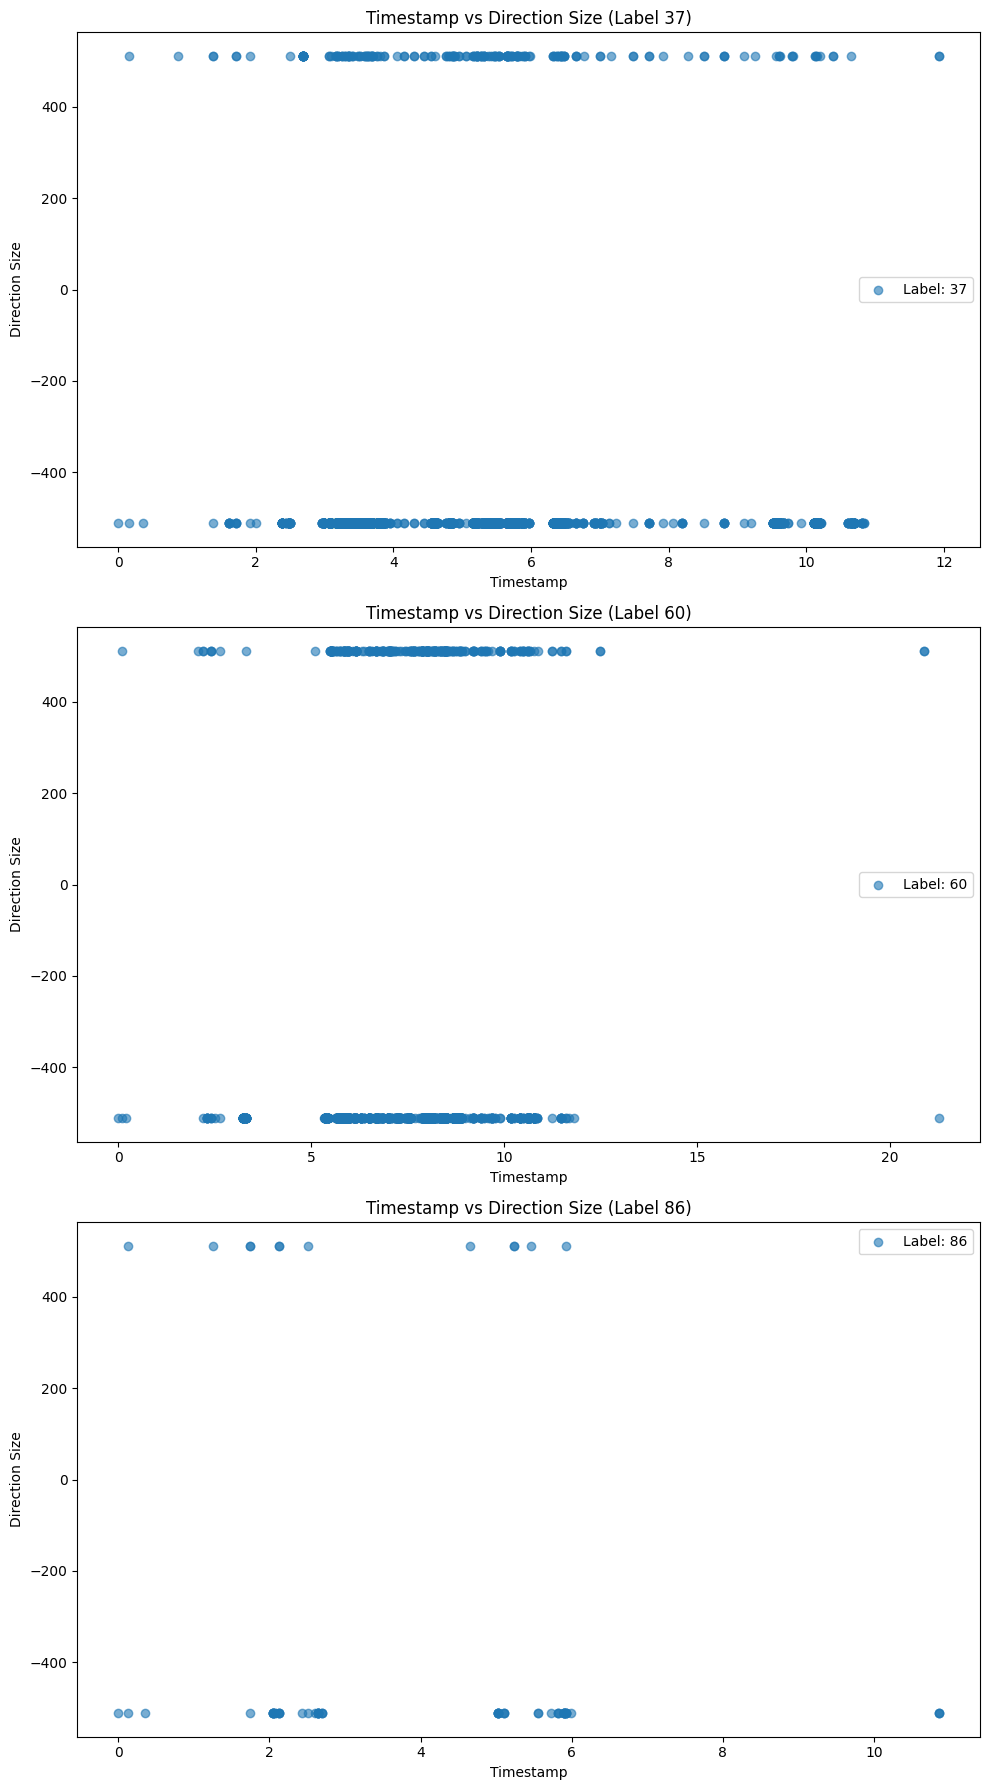

In [ ]:
import matplotlib.pyplot as plt

# Sample 3 random entries from the DataFrame
sampled_df = df.sample(3, random_state=42)

# Create a figure with 3 subplots (one for each sampled entry), arranged in a column
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Iterate over the sampled DataFrame and plot each subplot
for i, (idx, subset) in enumerate(sampled_df.iterrows()):
    ax = axes[i]  # Select the subplot
    # Exploding the lists into separate x and y points
    timestamps = subset['Timestamps']
    direction_sizes = subset['Direction_Size']
    label = subset['Label']

    # Scatter plot for each sampled data point
    ax.scatter(timestamps, direction_sizes, alpha=0.6, label=f'Label: {label}')
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Direction Size')
    ax.set_title(f'Timestamp vs Direction Size (Label {label})')
    ax.legend()

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Assuming X1 and X2 are your timestamp and packet size arrays, and each index corresponds to a different session or website
# Sample data
timestamps = np.array(X1)  # Your actual timestamps data
packet_sizes = np.array(X2)  # Your actual packet sizes data

# Selecting random indices from your data
random_indices = random.sample(range(len(timestamps)), 3)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Scatter plot for Packet Sizes
for index in random_indices:
    axs[0].scatter(timestamps[index], packet_sizes[index], alpha=0.5)

axs[0].set_title('Random Packet Sizes over Time')
axs[0].set_xlabel('Timestamp')
axs[0].set_ylabel('Packet Size')

# Cumulative packet timings
for index in random_indices:
    cumulative_sizes = np.cumsum(packet_sizes[index])  # Cumulative sum of sizes
    axs[1].plot(timestamps[index], cumulative_sizes)

axs[1].set_title('Cumulative Packet Timings')
axs[1].set_xlabel('Timestamp')
axs[1].set_ylabel('Cumulative Packet Size')

plt.tight_layout()
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (19000,) + inhomogeneous part.

# 2. Binary Classification

1. mon_standard.pkl > labelled 1
2. unmon_standard10.pkl > labelled -1

In [ ]:
import pickle
import pandas as pd

# Load and process the first dataset
print("Loading monitored datafile...")
with open('/content/gdrive/MyDrive/2024_ML/group_project/content/mon_standard.pkl', 'rb') as fi:
    mon_data = pickle.load(fi)

X1_mon, X2_mon, y_mon = [], [], []
URL_PER_SITE = 10
TOTAL_URLS_MON = 950

for i in range(TOTAL_URLS_MON):
    for sample in mon_data[i]:
        size_seq, time_seq = [], []
        for c in sample:
            dr = 1 if c > 0 else -1
            time_seq.append(abs(c))
            size_seq.append(dr * 512)
        X1_mon.append(time_seq)
        X2_mon.append(size_seq)
        y_mon.append(1) # Label for monitored data

# Load and process the second dataset
print("Loading unmonitored datafile...")
with open('/content/gdrive/MyDrive/2024_ML/group_project/content/unmon_standard10.pkl', 'rb') as f:
    unmon_data = pickle.load(f)

X1_unmon, X2_unmon, y_unmon = [], [], []
TOTAL_URLS_UNMON = 10000

for i in range(TOTAL_URLS_UNMON):
    size_seq, time_seq = [], []
    for c in unmon_data[i]:
        dr = 1 if c > 0 else -1
        time_seq.append(abs(c))
        size_seq.append(dr * 512)
    X1_unmon.append(time_seq)
    X2_unmon.append(size_seq)
    y_unmon.append(-1)  # Label for unmonitored data

# Combine all data into a DataFrame
X1_total = X1_mon + X1_unmon
X2_total = X2_mon + X2_unmon
y_total = y_mon + y_unmon

df_combined = pd.DataFrame({
    'Timestamps': X1_total,
    'Direction_Size': X2_total,
    'Label': y_total
})

print(df.head())  # Print the first few rows to verify

Loading monitored datafile...
Loading unmonitored datafile...
                                          Timestamps  \
0  [0.0, 0.14, 0.14, 0.31, 0.31, 0.51, 0.51, 0.51...   
1  [0.0, 0.13, 0.13, 0.31, 0.77, 1.11, 1.11, 1.11...   
2  [0.0, 0.11, 0.11, 0.23, 0.97, 1.11, 1.11, 1.11...   
3  [0.0, 0.27, 0.27, 0.6, 0.6, 0.88, 0.89, 0.89, ...   
4  [0.0, 0.11, 0.11, 0.36, 0.36, 0.6, 0.6, 0.6, 0...   

                                      Direction_Size  Label  
0  [-512, -512, 512, -512, 512, -512, 512, 512, -...      0  
1  [-512, -512, 512, -512, 512, -512, 512, 512, -...      0  
2  [-512, -512, 512, -512, 512, -512, 512, 512, -...      0  
3  [-512, -512, 512, -512, 512, -512, 512, 512, -...      0  
4  [-512, -512, 512, -512, 512, -512, 512, 512, -...      0  


In [ ]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29000 entries, 0 to 28999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Timestamps      29000 non-null  object
 1   Direction_Size  29000 non-null  object
 2   Label           29000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 679.8+ KB
